In [1]:
from Clases.Codigo import *

In [2]:
def buscaMN(vectU,vectV, th, rango=15, limDelta=0.1, show=True):
    lim = limDelta
    f1, f2 = 0, 0
    res = [[],[]]
    rmin = [0,0,0,0,0.0]
    rmin2 = [0,0,0,0,0.0]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    print("Busqueda en a pos")
    for k in range(1,(2*rango)+1):
        for i in range(k+1):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en a+
                a,b = i,-j
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)*(abs(delta))
                if (err<limDelta):
                    if(abs(1-delta)<0.03):
                        res[0].append([[a,b],[round(c),round(d)],delta])
                        print(">({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en a-
                if j!=0:
                    a,b = i,j
                    c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                    d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                    r1 = sumaV(multV(a,vectU),multV(b,vectV))
                    r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)*(abs(delta))
                    if (err<limDelta):
                        if(abs(1-delta)<0.03):
                            res[1].append([[a,b],[round(c),round(d)],delta])
                            print(">>({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100,":",dist(r1,r2)))
    return res

In [8]:
def superVectores(vs1,vs2,maximo=20,maxDelta=0.05, err=0.1):
    '''
    Calcula una lista de valores para 'm' y 'n' que cumplen las restricciones dadas
    '''
    (u1,u2),(v1,v2) = vs1
    (p1,p2),(q1,q2) = vs2
    A1 = dist((0.0,0.0),(u1,u2))
    A2 = dist((0.0,0.0),(p1,p2))
    eq0 = (q1*p2)-(q2*p1)
    eq1 = (q1*u2)-(q2*u1)
    eq2 = (q1*v2)-(q2*v1)
    eq3 = (p2*u1)-(p1*u2)
    eq4 = (p2*v1)-(p1*v2)
    vi, vs = (0,0), (0,0)
    du, dv = 1.0, 1.0
    res = []
    if eq0 == 0:
        return [(0,0),(0,0),0.0,[1.0,1.0]]
    for k in range(1,(2*maximo)+1):
        for i in range(1,k+1):
            j = k-i
            if j!=0:
                if (i<(maximo+1) and j<(maximo+1)):
                    a,b = i,j
                    c = ((a*eq1)-(b*eq2))/eq0
                    d = ((a*eq3)-(b*eq4))/eq0
                    pi = m2V((u1,u2),(v1,v2), (a,-b))
                    ps = m2V((p1,p2),(q1,q2), (round(c),round(d)))
                    erm = dist(pi,ps)
                    #d1 = A1*math.sqrt((a**2)+(b**2)-(a*b))
                    #d2 = A2*math.sqrt((round(c)**2)+(round(d)**2)+(round(c)*round(d)))
                    d1=dist((0.0,0.0),pi)
                    d2=dist((0.0,0.0),ps)
                    delta = (d1-d2)/d2
                    if ((1 + abs(delta))*erm)<err:
                        if abs(delta)<maxDelta:
                            vi, vs = [a,b], [round(c),round(d)]
                            res.append([vi,vs,delta,erm])
                            #print("({},{}) Delta={},err={}".format(a,b,delta,erm))
    return res

def mejorP(lista, detMin=200):
    '''
    Dada una lista de valores para 'm' y 'n' toma el par que genera el menor determinante
    para generar la matriz de transformacion P.
    '''
    res = (1,0,0,1)
    stress = 0.0
    for e in lista:
        m,n = e[0][0], e[0][1]
        det = (m**2)+(n**2)+(m*n)
        if det<detMin:
            res = (m,n,-n,m+n)
            detMin=det
            stress = e[2]
    (a,b,c,d)=res
    print("P=\t|{}\t {}|\n  \t|{}\t {}|".format(a,b,c,d))
    print("\nDet={}\tDelta={:.4f}%".format(detMin,stress*100))
    return res, detMin, stress


In [9]:
def sVopt(me1, me2,mD=0.05, er=0.1,maxDet=100):
    '''
    Dados 2 pares de vectores generadores me1 y me2 determina los vectores generadores para una
    superLattice que contenga de forma correcta las mallas generadas por me1 y me2.
    mD -> Delta máximo a aceptar.
    er -> Error máximo a aceptar (este se ajustará automáticamente si se requiere)
    maxDet -> Determinante máximo a aceptar.
    '''
    (u,v)=(me1.u,me1.v)
    (p,q)=(me2.u,me2.v)
    l0 = superVectores((u,v),(p,q),maxDelta=mD, err=er)
    P,d,delta = mejorP(l0)
    while d>=maxDet:
        print("**La matriz P es muy grande.**\n\tSe aumentará el rango de error")
        er=er+0.1
        l0 = superVectores((u,v),(p,q),maxDelta=mD, err=er)
        P,d,delta = mejorP(l0)
    su, sv = transfVs(me1.u,me1.v,P)
    return su, sv, delta

def superM(lom):
    '''
    Genera una superLattice que contiene todas las rejillas en la lista 'lom' 
    '''
    if len(lom)<2:
        print("ERROR\nDebe haber al menos 2 capas")
        return hexa6(1.0)
    su, sv, delta = sVopt(lom[0],lom[1])
    if delta!=0.0:
        lom[1].u = multV((1+delta),lom[1].u)
        lom[1].v = multV((1+delta),lom[1].v)
    print("\tvectores={},{}\n".format(su,sv))
    for i in range(2,len(lom)):
        su, sv, delta = sVopt(Malla(su, sv),lom[i])
        if delta!=0.0:
            lom[i].u = multV((1+delta),lom[i].u)
            lom[i].v = multV((1+delta),lom[i].v)
        print("\tvectores={},{}\n".format(su,sv))
    return superMesh(su, sv,lom)


In [43]:
m0 = hexa3(2.44, atms=['C','C'])

In [47]:
m1 = m0.mRot(21.78)
m2 = m0.mRot(21.78-13.17)

In [48]:
l0 = superVectores((m0.u,m0.v),(m2.u,m2.v),maxDelta=0.05,err=0.2)
P,d,delta=mejorP(l0)
d

P=	|11	 1|
  	|-1	 12|

Det=133	Delta=0.0000%


133

In [28]:
(2.44*math.sqrt((4*4)+(4*4)+(4*4))-2.44*math.sqrt((0**2)+(7**2)+(7*0)))/(2.44*math.sqrt((0**2)+(7**2)+(7*0)))

-0.010256681389212896

In [6]:
l0

[[[1, 2], [-1, -3], 0.0, 0.9246072119897505],
 [[2, 1], [1, -2], 1.3758192145087138e-16, 0.9246072119897483],
 [[1, 3], [-1, -4], 2.0191505888962026e-16, 0.3384297281105511],
 [[3, 1], [1, -3], 2.0191505888962026e-16, 0.3384297281105536],
 [[2, 3], [-1, -5], -0.048810268788658004, 0.9845979775179519],
 [[3, 2], [1, -4], -0.048810268788658004, 0.9845979775179484],
 [[2, 4], [-1, -6], -0.049618073377017145, 0.8102583600122183],
 [[3, 3], [0, -5], 0.03923048454132649, 0.4786119114041837],
 [[4, 2], [1, -5], -0.04961807337701703, 0.8102583600122205],
 [[2, 5], [-2, -7], 2.331514272067228e-16, 0.5861774838792013],
 [[5, 2], [2, -5], 0.0, 0.5861774838791952],
 [[1, 7], [-3, -9], -0.04881026878865806, 1.7053737220906486],
 [[2, 6], [-2, -8], 2.0191505888962026e-16, 0.6768594562211022],
 [[4, 4], [0, -7], -0.010256681389212896, 0.17518411812775472],
 [[6, 2], [2, -6], 2.0191505888962026e-16, 0.6768594562211072],
 [[1, 8], [-4, -10], -0.019935555287575103, 0.5096654167021355],
 [[2, 7], [-3, -9

In [12]:
u,v=m0.u,m0.v
ru,rv=m1.u,m1.v
print(dist(m2V(u,v,(4,-4)),m2V(ru,rv,(0,-7))))
s1,s2=(m2V(u,v,(4,-4)),m2V(ru,rv,(0,-7)))
print(s1,s2)
(dist((0,0),s1)-dist((0,0),s2))/dist((0,0),s2)

2.4420031464409777
(14.64, -8.452407940936121) (13.418747939257877, -10.567100063057152)


-0.010256681389213103

In [82]:
su,sv=transfVs(u,v,P)
sCell=superMesh(su,sv,[m0,m1])
sCell.exporta(name='A30')

1

In [113]:
'''
(1,1) Delta=-0.13397459621556118, Diferencia en posición=0.6537960295319386
(4,4) Delta=-0.010256681389212896, Diferencia en posición=0.17518411812775472
'''
((1+0.13397459621556118)*0.6537960295319386, (1+0.010256681389212896)*0.17518411812775472)

(0.7413880885958172, 0.17698092581184133)

In [124]:
delta

-0.010256681389212896

P=	|2	 1|
  	|-1	 3|

Det=7	Delta=0.0000%
	vectores=(6.1, -2.1131019852340303),(-1.2200000000000002, 6.339305955702091)

P=	|11	 1|
  	|-1	 12|

Det=133	Delta=0.0000%
**La matriz P es muy grande.**
	Se aumentará el rango de error
P=	|11	 1|
  	|-1	 12|

Det=133	Delta=0.0000%
**La matriz P es muy grande.**
	Se aumentará el rango de error
P=	|2	 1|
  	|-1	 3|

Det=7	Delta=1.0363%
	vectores=(13.42, -10.56550992617015),(2.439999999999999, 16.904815881872242)



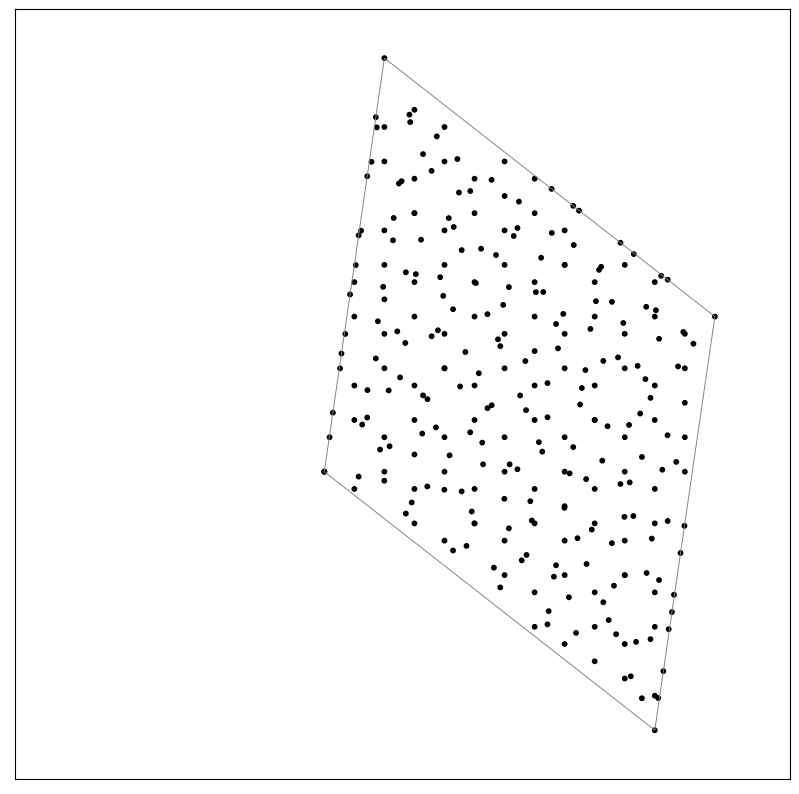

1

In [50]:
ssM = superM([m0,m1,m2])
ssM.showNM(1,1)
ssM.exporta(name='3Capas(ALgo,13.17)')

P=	|2	 1|
  	|-1	 3|

Det=7	Delta=0.0000%
	vectores=(6.1, -2.1131019852340303),(-1.2200000000000002, 6.339305955702091)

P=	|9	 7|
  	|-7	 16|

Det=193	Delta=0.0000%
**La matriz P es muy grande.**
	Se aumentará el rango de error
P=	|1	 2|
  	|-2	 3|

Det=7	Delta=1.0363%
	vectores=(8.54, -14.791713896638212),(8.54, 14.791713896638214)



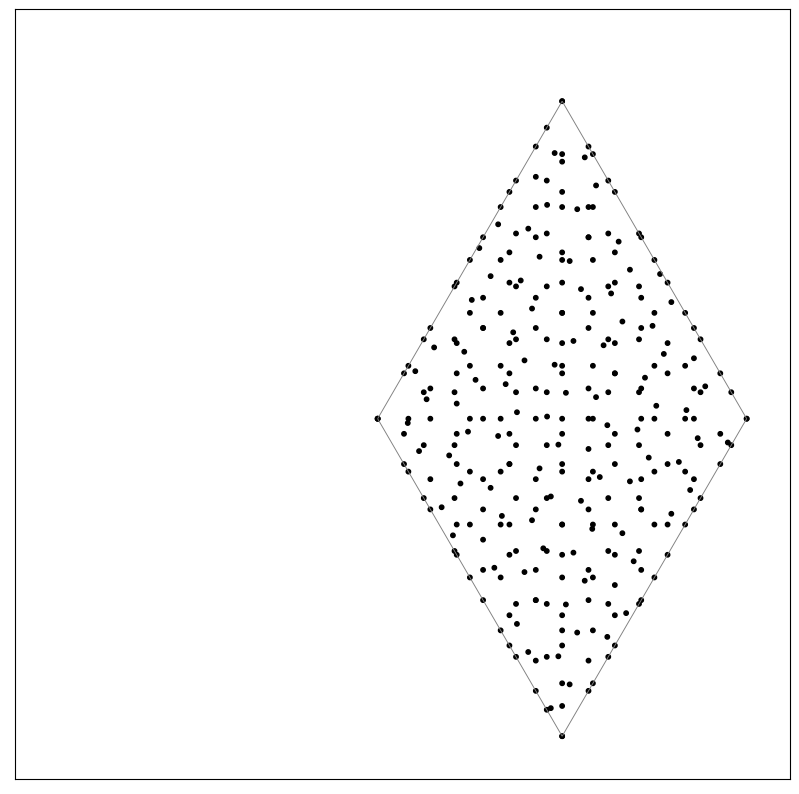

1

In [10]:
ssM = superM([m0,m1,m2])
ssM.showNM(1,1)
ssM.exporta(name='3Capas(21.78,30)')

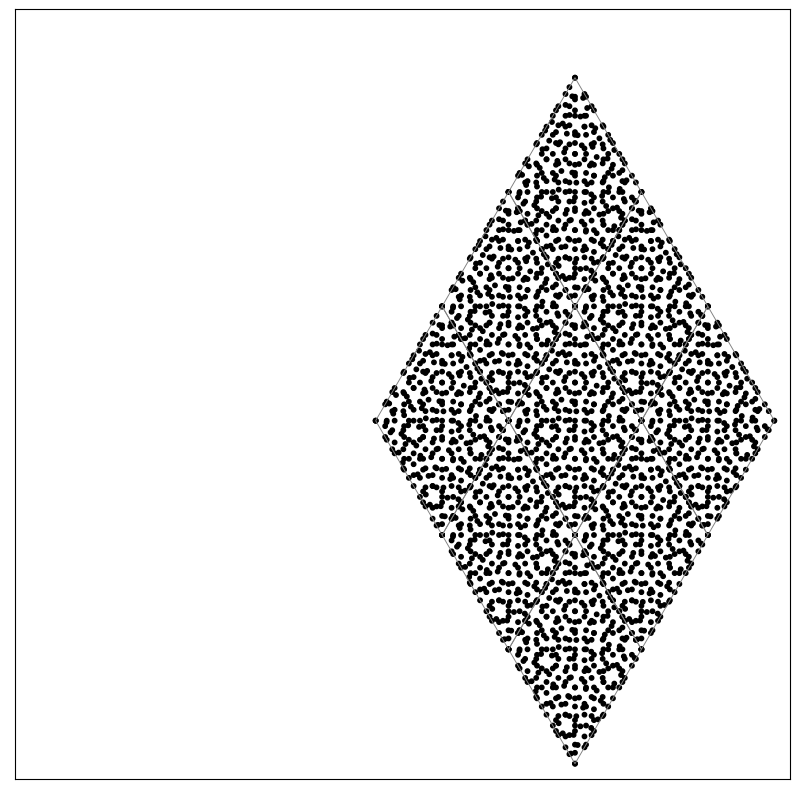

1

In [13]:
ssM.showNM(3,3,name='tapete')

In [32]:
m0 = hexa6(2.44, atms=['C','C'])
ms = hexa3(2.44, atms=['C','C'])
m1 = ms.mRot(30)

P=	|4	 11|
  	|-11	 15|

Det=181	Delta=0.0000%
**La matriz P es muy grande.**
	Se aumentará el rango de error
P=	|4	 4|
  	|-4	 8|

Det=48	Delta=-1.0257%
	vectores=(14.64, -8.452407940936121),(0.0, 16.904815881872242)



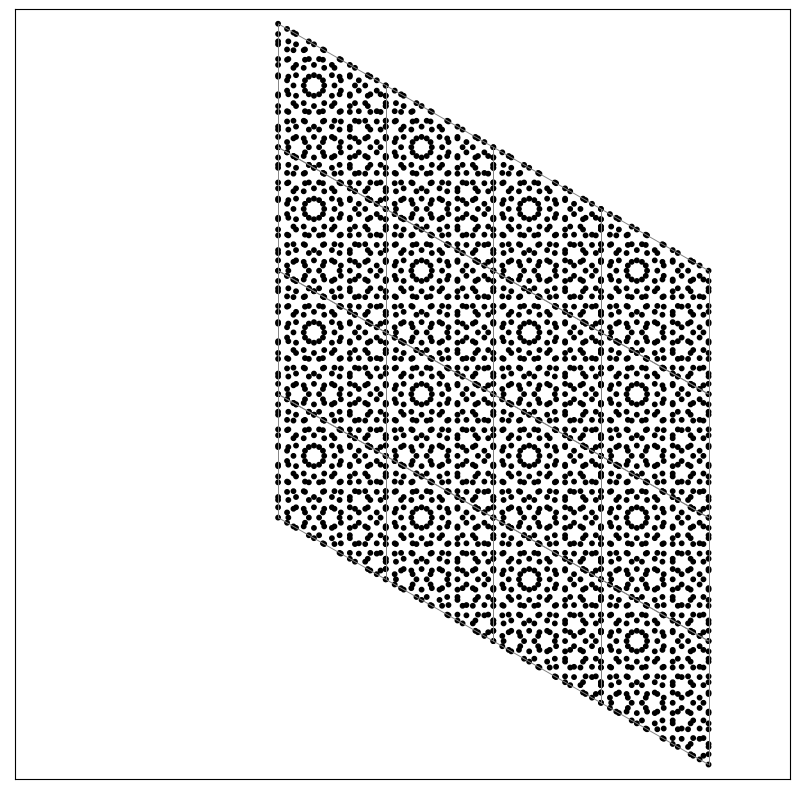

1

In [33]:
ssM = superM([m0,m1])
ssM.showNM(4,4)
ssM.exporta(name='s6xs3(30°)')

In [21]:
m0 = hexa6(2.44, atms=['C','C'])
ms = hexa3(2.44, atms=['C','C'])
m2 = m0.mRot(30)
l0=superVectores((m0.u,m0.v),(m2.u,m2.v))
l0

[[[4, 11], [-4, -15], 0.0, 0.09068197234189967],
 [[11, 4], [4, -11], 2.1645174432333183e-16, 0.09068197234191168],
 [[15, 15], [0, -26], -0.0007399187102629022, 0.046940442979082224]]

In [19]:
l0[0][2]

0.0